# **US Airlines dataset - EDA**


# **Table of Contents**
* [1.Introduction](#1)
* [2.Import Libraries and Load data](#2)
* [4.Data Understanding](#3)
* [5.Data Preprocessing](#4)
  * [Handling the missing values](#6)
  * [Convert type of attributes](#7)
  * [Preprocessing Data](#8)
* [6. Report: Pandas profiling](#6)
* [7. Export](#7)


<a id="1"></a> <br>
# **1. Introduction**

The dataset we'll be analyzing is the dataset which is scrapped from Twitter. It shows the information of reviews for airline brand.

#### **Attributes:**
The metadata of the columns:



 

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="1"></a> <br>
# **2. Imports and load data**

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import emoji

/tmp/ipykernel_50530/1684520897.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# First, let's load the data
df = pd.read_csv("../data/airline.csv")

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df.shape

(14640, 15)

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="3"></a> <br>
# **3. Data Understanding**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


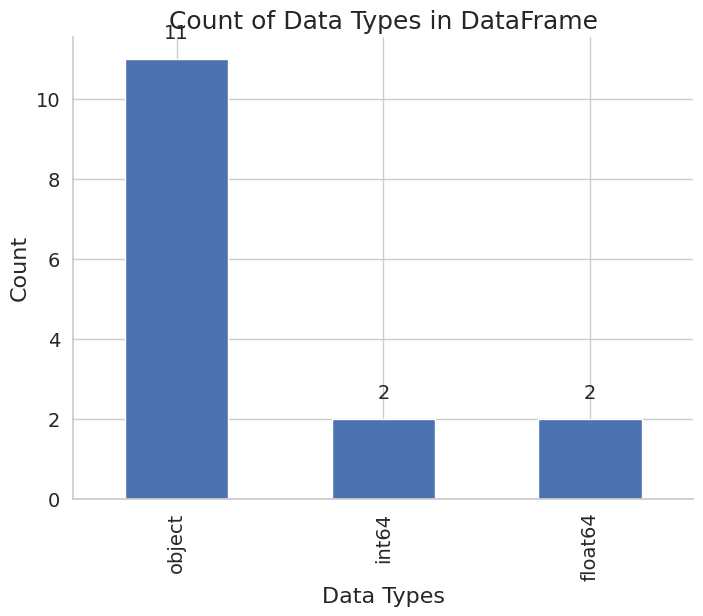

In [6]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

ax = df.dtypes.value_counts().plot(kind="bar", fontsize=14)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.0, height + 0.5, height, ha="center", size=14)

plt.xlabel("Data Types", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Count of Data Types in DataFrame", fontsize=18)

sns.despine()

plt.show()

Observation:

There are 4 numerical features and 11 object (string) types. Among the numeric features, 2 are int types and 2 are float types. 

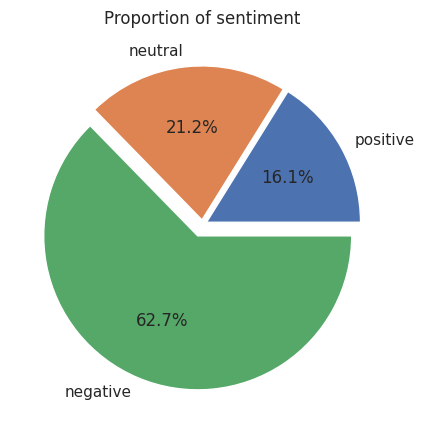

In [7]:
x = df.airline_sentiment.value_counts().sort_values()

plt.figure(figsize=(5, 5))
ax = plt.pie(x=x, labels=x.index, autopct="%1.1f%%", explode=[0.03, 0.03, 0.08])
plt.title("Proportion of sentiment")

plt.show()

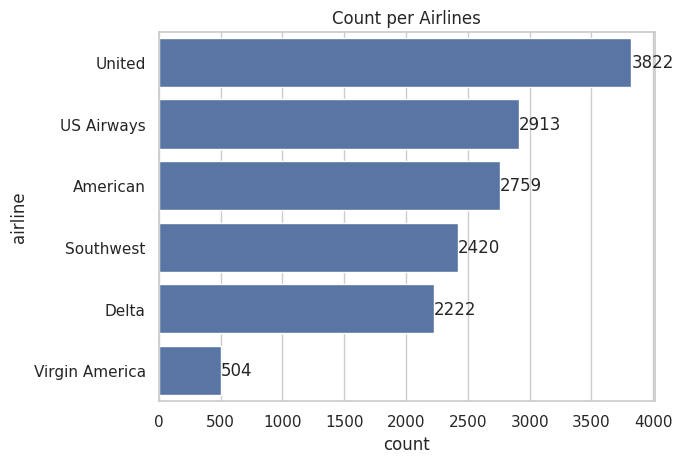

In [8]:
ax = sns.countplot(data=df, y="airline", order=df.airline.value_counts().index)
ax.bar_label(ax.containers[0])
ax.set_title(
    "Count per Airlines",
)

plt.show()

In [9]:
count_per_ailine = (
    df.groupby(["airline", "airline_sentiment"])["airline_sentiment"].count().unstack()
)
count_per_ailine

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


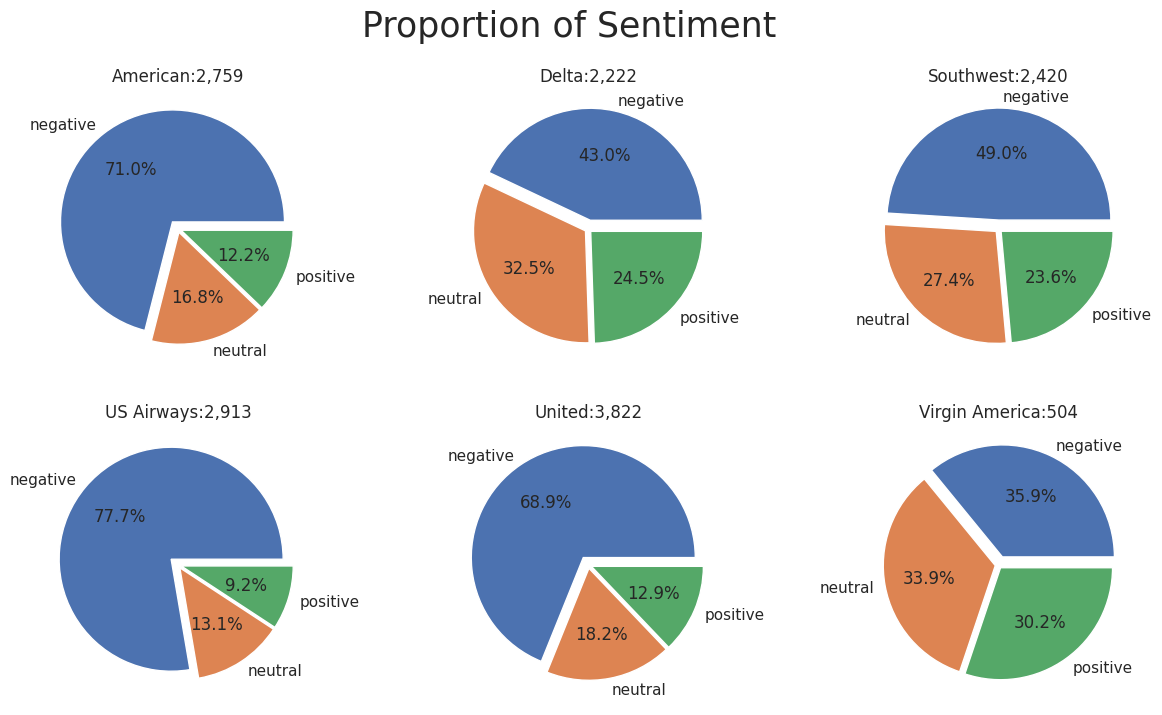

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()
for i, ax in zip(range(0, 6), axes):
    temp = count_per_ailine.iloc[i]
    ax.pie(x=temp, labels=temp.index, autopct="%1.1f%%", explode=[0.08, 0.03, 0.03])
    ax.set_title(
        f"{count_per_ailine.index[i]}:{format(count_per_ailine.values[i].sum(),',')}"
    )

plt.suptitle("Proportion of Sentiment", fontsize=25)
plt.show()

In [11]:
df_neg = df[df.airline_sentiment == "negative"]
display(df_neg.shape, df_neg.head())

(9178, 15)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)


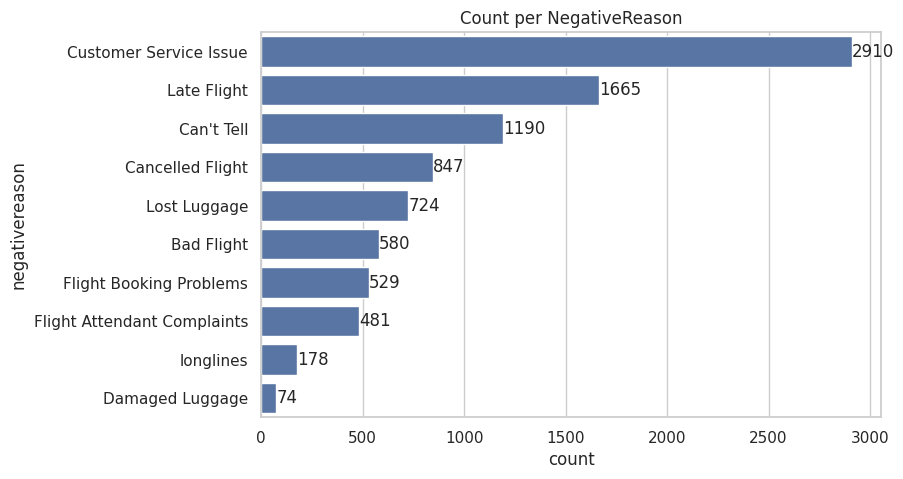

In [12]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=df_neg, y="negativereason", order=df_neg.negativereason.value_counts().index
)

ax.bar_label(ax.containers[0])
ax.set_title("Count per NegativeReason")

plt.show()

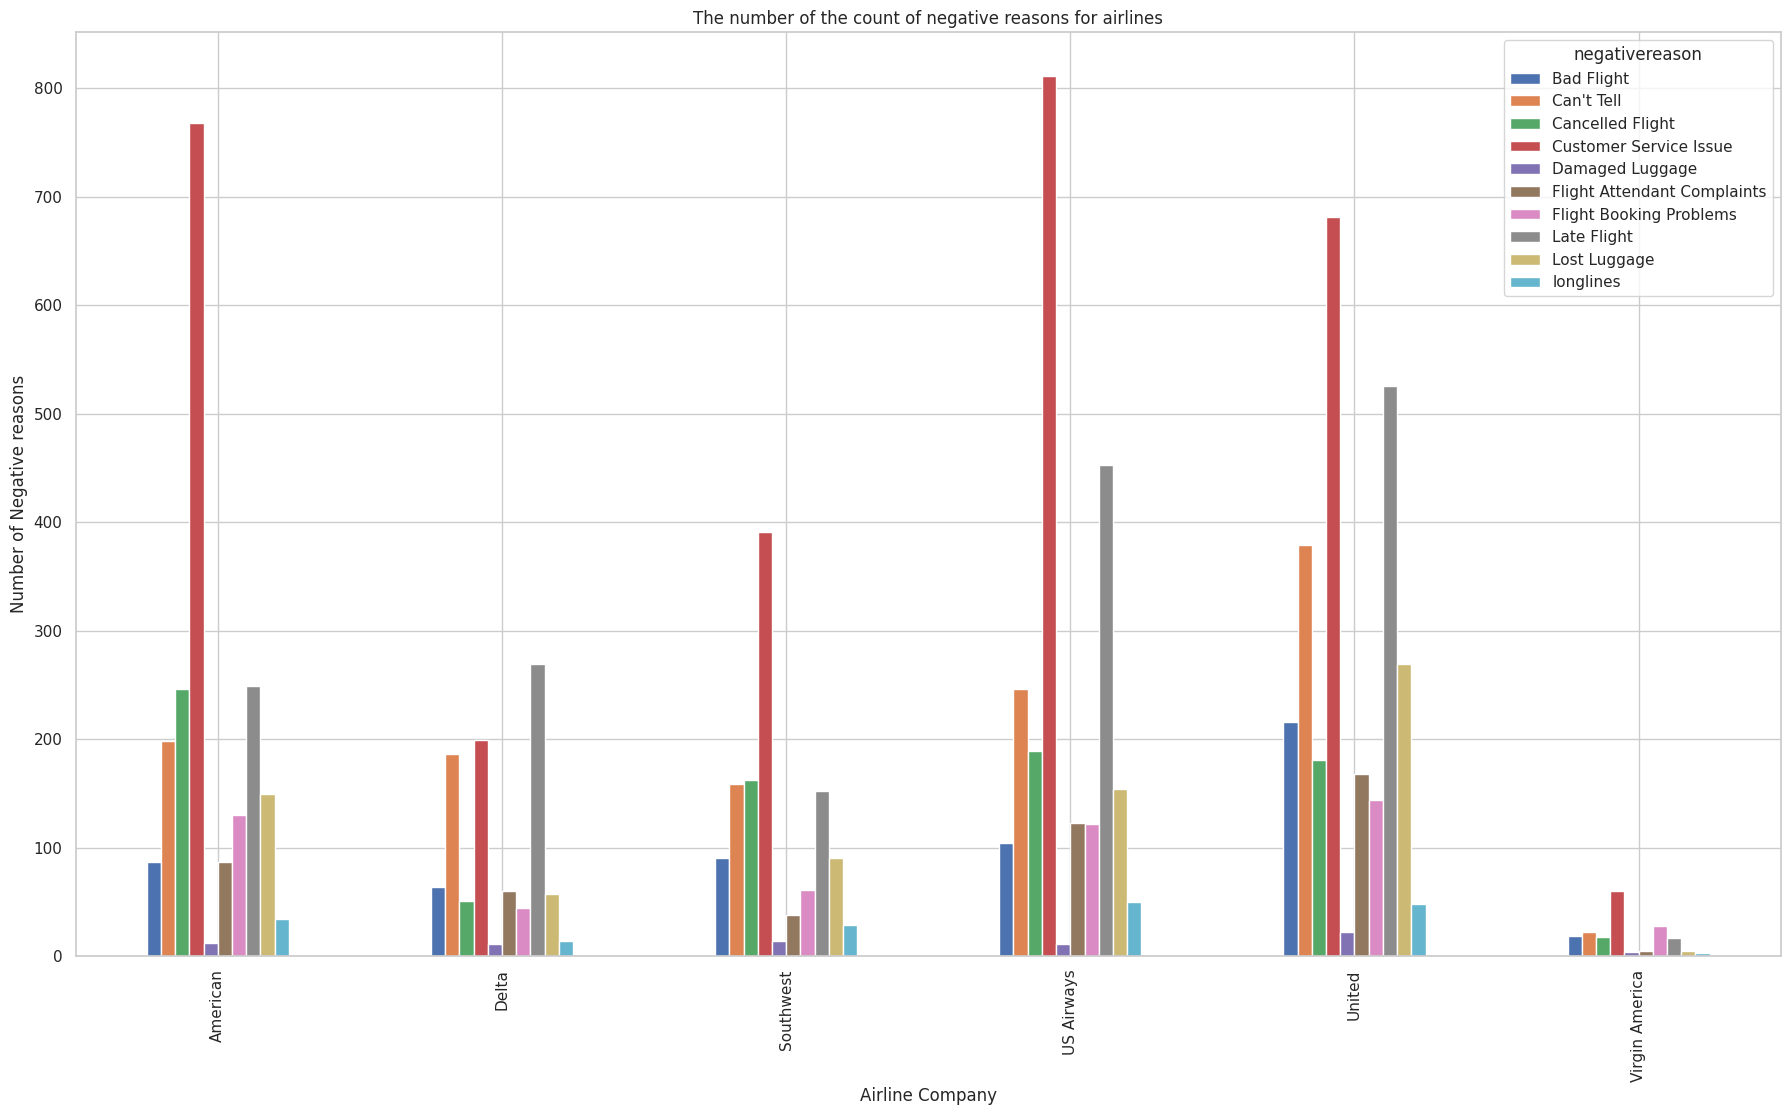

In [13]:
negative_reasons = df.groupby("airline")["negativereason"].value_counts(ascending=True)
negative_reasons.groupby(["airline", "negativereason"]).sum().unstack().plot(
    kind="bar", figsize=(22, 12)
)
plt.xlabel("Airline Company")
plt.ylabel("Number of Negative reasons")
plt.title("The number of the count of negative reasons for airlines")
plt.show()

Check misisng values in data

In [14]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [15]:
def display_only_missing(df):
    all_data_na = (df.isnull().sum() / len(df)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(
        ascending=False
    )
    missing_data = pd.DataFrame({"Missing Ratio": all_data_na})
    print(missing_data)

In [16]:
print("Percentage Missing Value %")
display_only_missing(df)

Percentage Missing Value %
                           Missing Ratio
negativereason_gold            99.781421
airline_sentiment_gold         99.726776
tweet_coord                    93.039617
negativereason                 37.308743
user_timezone                  32.923497
tweet_location                 32.329235
negativereason_confidence      28.128415


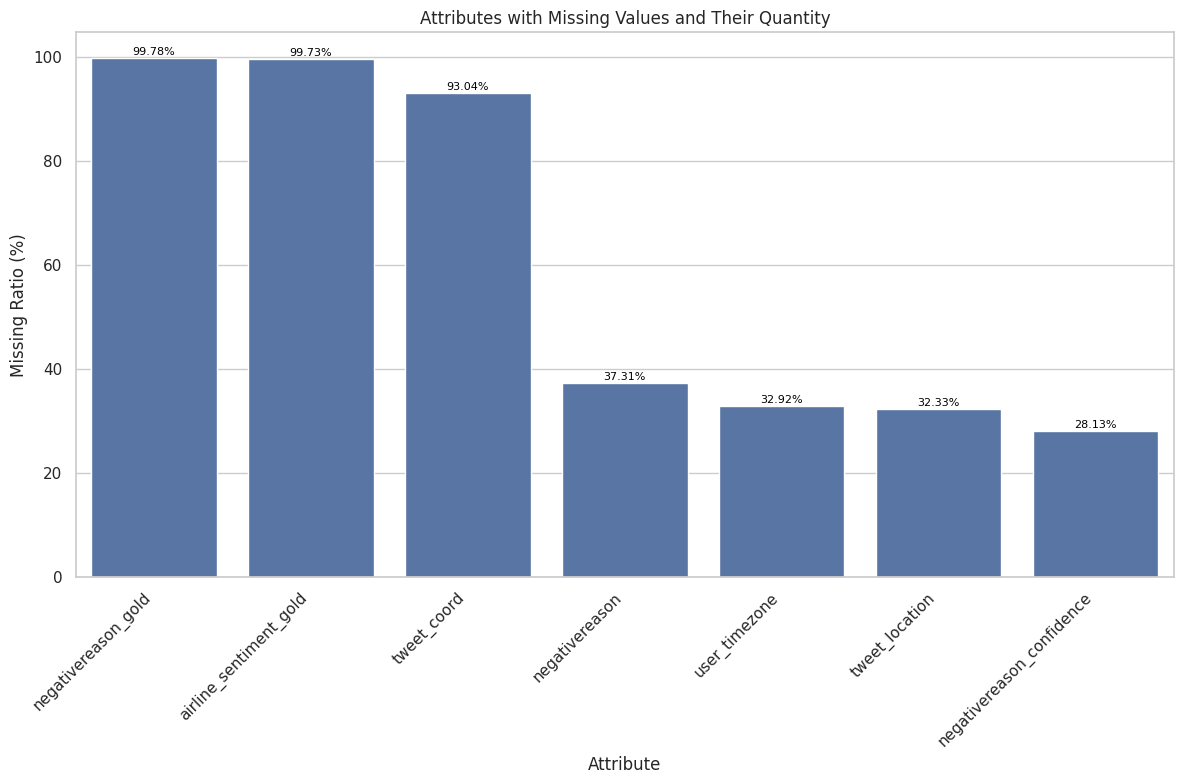

In [17]:
# Calculate the missing ratio for each attribute
missing_ratio = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to store the missing values information
missing_data = pd.DataFrame({"Attribute": df.columns, "MissingRatio": missing_ratio})
missing_data = missing_data[missing_data["MissingRatio"] > 0].sort_values(
    by="MissingRatio", ascending=False
)

# Plot the missing values with values at the top of each bar
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x="Attribute", y="MissingRatio", data=missing_data)

# Add values at the top of each bar
for index, value in enumerate(missing_data["MissingRatio"]):
    barplot.text(
        index,
        value + 0.2,
        f"{value:.2f}%",
        ha="center",
        va="bottom",
        fontsize=8,
        color="black",
    )

plt.title("Attributes with Missing Values and Their Quantity")
plt.xlabel("Attribute")
plt.ylabel("Missing Ratio (%)")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="4"></a> <br>
# **4. Data Preprocessing**

Check number of duplicated rows in data and drop these rows

In [18]:
df.duplicated().sum()

36

In [19]:
df.drop_duplicates(inplace=True)

We can drop the columns which we don't required

In [20]:
df.drop(
    columns=["tweet_id", "name"],
    inplace=True,
)
df.shape

(14604, 13)

<a id="41"></a> 
### **Handling the missing values**

We will drop the attributes with too many null values. Namely, "negativereason_gold", "airline_sentiment_gold", "tweet_coord" .

In [21]:
df.drop(
    columns=["negativereason_gold", "airline_sentiment_gold", "tweet_coord"],
    inplace=True,
)
df.shape

(14604, 10)

We can drop the columns which we don't required

In [22]:
df.drop(
    columns=[
        "negativereason",
        "user_timezone",
        "tweet_location",
        "negativereason_confidence",
    ],
    inplace=True,
)
df.shape

(14604, 6)

<a id="42"></a> 
### **Encoding the labels**

In [23]:
numeric_var = {"airline_sentiment": {"negative": -1, "neutral": 0, "positive": 1}}
df = df.replace(numeric_var)

/tmp/ipykernel_50530/4095868285.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(numeric_var)


In [24]:
df["airline_sentiment"].unique()

array([ 0,  1, -1])

<a id="43"></a> 
### **Cleaning text**

In [25]:
def tweet_to_words(tweet):
    """Convert tweet text into a sequence of words"""
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words


print("\nOriginal tweet ->", df["text"][0])
print("\nProcessed tweet ->", tweet_to_words(df["text"][0]))


Original tweet -> @VirginAmerica What @dhepburn said.

Processed tweet -> ['virginamerica', 'dhepburn', 'said']


In [26]:
from tqdm import tqdm

print("Cleaning the tweets...\n")
clean_tweet_texts = []

for i in range(5):
    # print(f"Tweets {i + 1} of {df.shape[0]} has been processed")
    clean_tweet_texts.append(tweet_to_words(df["text"][i]))

Cleaning the tweets...



ModuleNotFoundError: No module named 'sleep'

In [ ]:
print(clean_tweet_texts)

[['virginamerica', 'dhepburn', 'said'], ['virginamerica', 'plu', 'ad', 'commerci', 'experi', 'tacki'], ['virginamerica', 'today', 'must', 'mean', 'need', 'take', 'anoth', 'trip'], ['virginamerica', 'realli', 'aggress', 'blast', 'obnoxi', 'entertain', 'guest', 'face', 'amp', 'littl', 'recours'], ['virginamerica', 'realli', 'big', 'bad', 'thing'], ['virginamerica', 'serious', 'would', 'pay', '30', 'flight', 'seat', 'play', 'realli', 'bad', 'thing', 'fli', 'va'], ['virginamerica', 'ye', 'nearli', 'everi', 'time', 'fli', 'vx', 'ear', 'worm', 'go', 'away'], ['virginamerica', 'realli', 'miss', 'prime', 'opportun', 'men', 'without', 'hat', 'parodi', 'http', 'co', 'mwpg7grezp'], ['virginamerica', 'well'], ['virginamerica', 'amaz', 'arriv', 'hour', 'earli', 'good']]


In [ ]:
df["text"][:10]

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
5    @VirginAmerica seriously would pay $30 a fligh...
6    @VirginAmerica yes, nearly every time I fly VX...
7    @VirginAmerica Really missed a prime opportuni...
8      @virginamerica Well, I didn't…but NOW I DO! :-D
9    @VirginAmerica it was amazing, and arrived an ...
Name: text, dtype: object